Project - Data Preprocessing and EDA 

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the data

df = pd.read_csv("C:\\Sem 4\\ML\\Project\\bank_data.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [3]:
# Check if categorical columns have nulls
categorical = df.select_dtypes(include='object').columns

for x in categorical:
    if df[x].isnull().any() or (df[x] == 'unknown').any():
        print("There are nulls", x)
    else:
        print("No Nulls in", x)

# Check if numerical columns have nulls
categorical = df.select_dtypes(include=['int64', 'float64']).columns

for x in categorical:
    if df[x].isnull().any() or (df[x] == 'unknown').any():
        print("There are nulls", x)
    else:
        print("No Nulls in", x)

There are nulls job
There are nulls marital
There are nulls education
There are nulls default
There are nulls housing
There are nulls loan
No Nulls in contact
No Nulls in month
No Nulls in day_of_week
No Nulls in poutcome
No Nulls in y
No Nulls in age
No Nulls in duration
No Nulls in campaign
No Nulls in pdays
No Nulls in previous
No Nulls in emp.var.rate
No Nulls in cons.price.idx
No Nulls in cons.conf.idx
No Nulls in euribor3m
No Nulls in nr.employed


In [4]:
x = ['job', 'marital', 'education', 'default', 'housing', 'loan']

for i in x:
    unknown_count = (df[i] == 'unknown').sum()
    print(f"{i}: {df[i].unique()}, Number of 'unknown': {unknown_count}")


job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student'], Number of 'unknown': 330
marital: ['married' 'single' 'divorced' 'unknown'], Number of 'unknown': 80
education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate'], Number of 'unknown': 1731
default: ['no' 'unknown' 'yes'], Number of 'unknown': 8597
housing: ['no' 'yes' 'unknown'], Number of 'unknown': 990
loan: ['no' 'yes' 'unknown'], Number of 'unknown': 990


In [13]:
default_df = df[df['default'] == 'unknown']
default_df

import matplotlib.pyplot as plt

# Assuming your original DataFrame is named df
# Plot the distribution of the 'balance' column
plt.figure(figsize=(10, 6))
plt.hist(default_df['balance'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Balance')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


KeyError: 'balance'

<Figure size 1000x600 with 0 Axes>

In [5]:
unknown_rows = df[df.apply(lambda row: row.str.contains('unknown').any(), axis=1)]
unknown_rows

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
10,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
15,54,retired,married,basic.9y,unknown,yes,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41118,34,technician,married,unknown,no,yes,no,cellular,nov,tue,...,2,999,2,failure,-1.1,94.767,-50.8,1.046,4963.6,no
41120,60,admin.,married,unknown,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.046,4963.6,no
41122,34,technician,married,unknown,no,no,no,cellular,nov,tue,...,3,999,0,nonexistent,-1.1,94.767,-50.8,1.046,4963.6,yes
41135,54,technician,married,unknown,no,yes,no,cellular,nov,thu,...,1,999,1,failure,-1.1,94.767,-50.8,1.041,4963.6,no


In [6]:
x = ['job', 'marital', 'education', 'default', 'housing', 'loan']

for column in x:
    mode_value = df[column].mode().iloc[0]  # .mode() returns a Series, use .iloc[0] to get the first mode
    unknown_count = (df[column] == 'unknown').sum()
    print(f"{column} - Mode:{mode_value}, Unknowns: {unknown_count}")

job - Mode:admin., Unknowns: 330
marital - Mode:married, Unknowns: 80
education - Mode:university.degree, Unknowns: 1731
default - Mode:no, Unknowns: 8597
housing - Mode:yes, Unknowns: 990
loan - Mode:no, Unknowns: 990


In [7]:
# Print the unique values in the categorical columns to check if bad data exists
categorical = df.select_dtypes(include='object').columns

for x in categorical:
    print(f"{x}: {df[x].unique()}")

job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital: ['married' 'single' 'divorced' 'unknown']
education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default: ['no' 'unknown' 'yes']
housing: ['no' 'yes' 'unknown']
loan: ['no' 'yes' 'unknown']
contact: ['telephone' 'cellular']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week: ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome: ['nonexistent' 'failure' 'success']
y: ['no' 'yes']


In [8]:
# Check stats for numerical columns
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


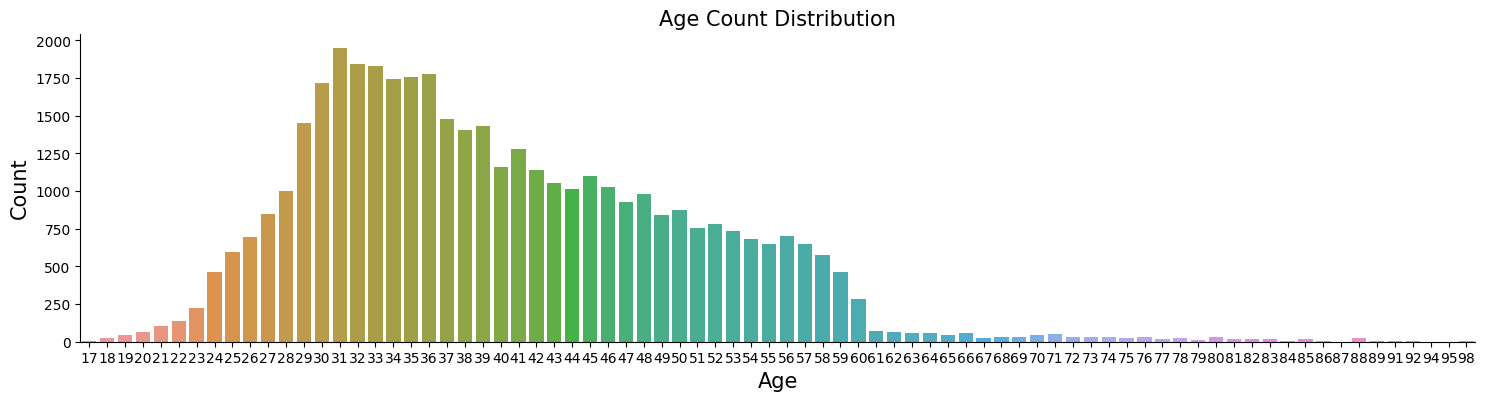

In [9]:
# Basic EDA - Age
fig, ax = plt.subplots()
fig.set_size_inches(18, 4)
sns.countplot(x = 'age', data = df)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()


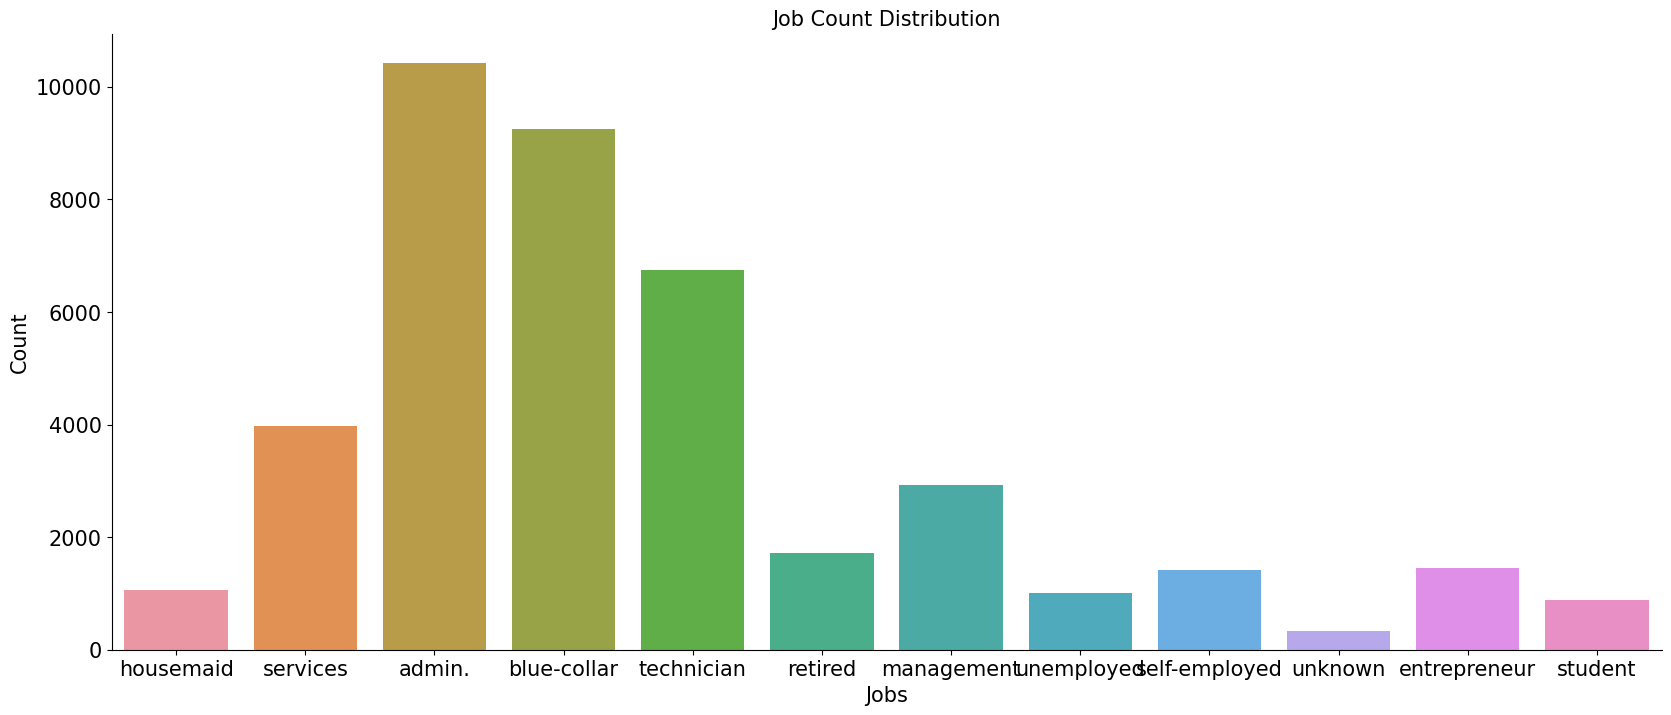

In [10]:
# EDA - Jobs
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = df)
ax.set_xlabel('Jobs', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Job Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

ValueError: Could not interpret input 'balance'

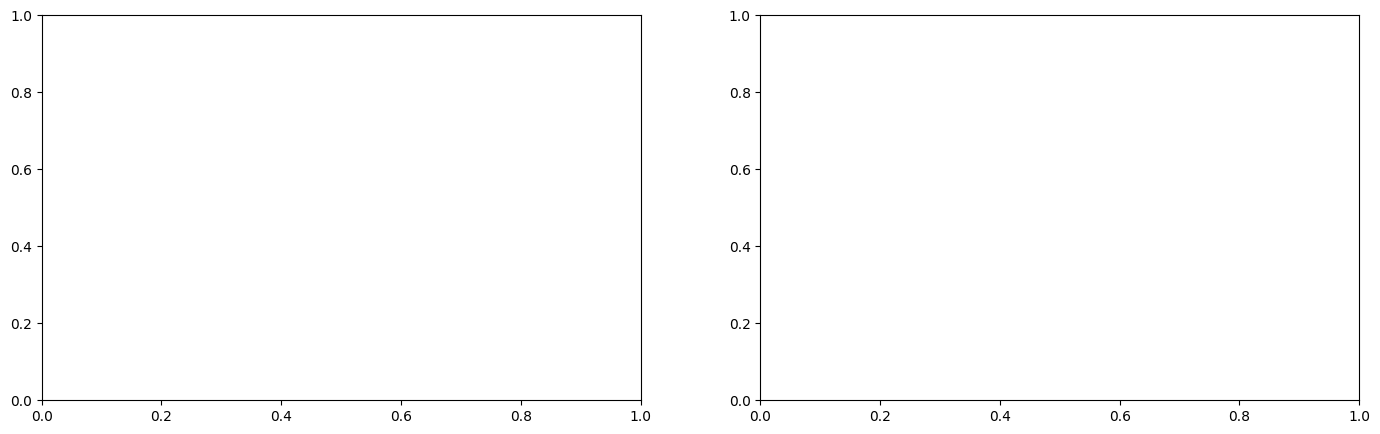

In [11]:
# Balance and duration standard deviation is large, check

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (17, 5))
sns.boxplot(x = 'balance', data = df, orient = 'v', ax = ax1)
ax1.set_xlabel('People Balance', fontsize=15)
ax1.set_ylabel('Balance', fontsize=15)
ax1.set_title('Balance Distribution', fontsize=15)
ax1.tick_params(labelsize=15)


sns.boxplot(x = 'duration', data = df, orient = 'v', ax = ax2)
ax2.set_xlabel('duration', fontsize=15)
ax2.set_ylabel('duration', fontsize=15)
ax2.set_title('Duration Distribution', fontsize=15)
ax2.tick_params(labelsize=15)

In [ ]:
# Check values of balance and duration 
# Calculate the minimum, Q1 (25th percentile), median (Q2 or 50th percentile), Q3 (75th percentile), and maximum
min_balance = df['balance'].min()
q1_balance = df['balance'].quantile(0.25)
median_balance = df['balance'].median()
q3_balance = df['balance'].quantile(0.75)
max_balance = df['balance'].max()
iqr_balance = q3_balance - q1_balance
min_whisker = q1_balance - 1.5 * iqr_balance 
max_whisker = q3_balance + 1.5 * iqr_balance 


# Print the calculated statistics
print(f"Q1 (25th percentile): {q1_balance}")
print(f"Q3 (75th percentile): {q3_balance}")
print(f"IQR (Interquartile Range): {iqr_balance}")
print(f"Minimum value (whisker): {min_whisker}")
print(f"Maximum value (whisker): {max_whisker}")
print(f"Actual minimum value: {min_balance}")
print(f"Actual maximum value: {max_balance}")

count_above_max_whisker = len(df[df['balance'] > max_whisker])
count_below_min_whisker = len(df[df['balance'] < min_whisker])
print(f"\nBalance Outliers greater than the maximum whisker: {count_above_max_whisker}")
print(f"Balance Outliers lesser than the minimum whisker: {count_below_min_whisker}")

Q1 (25th percentile): 72.0
Q3 (75th percentile): 1428.0
IQR (Interquartile Range): 1356.0
Minimum value (whisker): -1962.0
Maximum value (whisker): 3462.0
Actual minimum value: -8019
Actual maximum value: 102127

Balance Outliers greater than the maximum whisker: 4712
Balance Outliers lesser than the minimum whisker: 17


In [ ]:
# Check values of balance and duration 
# Calculate the minimum, Q1 (25th percentile), median (Q2 or 50th percentile), Q3 (75th percentile), and maximum
min_duration = df['duration'].min()
q1_duration = df['duration'].quantile(0.25)
median_duration = df['duration'].median()
q3_duration = df['duration'].quantile(0.75)
max_duration = df['duration'].max()
iqr_duration = q3_duration - q1_duration
min_whisker = q1_duration - 1.5 * iqr_duration 
max_whisker = q3_duration + 1.5 * iqr_duration 

# Print the calculated statistics
print(f"Q1 (25th percentile): {q1_duration}")
print(f"Q3 (75th percentile): {q3_duration}")
print(f"IQR (Interquartile Range): {iqr_duration}")
print(f"Minimum value (whisker): {min_whisker}")
print(f"Maximum value (whisker): {max_whisker}")
print(f"Actual minimum value: {min_duration}")
print(f"Actual maximum value: {max_duration}")

count_above_max_whisker = len(df[df['duration'] > max_whisker])
count_below_min_whisker = len(df[df['duration'] < min_whisker])
print(f"\nDuration Outliers greater than the maximum whisker: {count_above_max_whisker}")
print(f"Duration Outliers lesser than the minimum whisker: {count_below_min_whisker}")



Q1 (25th percentile): 103.0
Q3 (75th percentile): 319.0
IQR (Interquartile Range): 216.0
Minimum value (whisker): -221.0
Maximum value (whisker): 643.0
Actual minimum value: 0
Actual maximum value: 4918

Duration Outliers greater than the maximum whisker: 3235
Duration Outliers lesser than the minimum whisker: 0


In [ ]:
# Check values of balance and age 
# Calculate the minimum, Q1 (25th percentile), median (Q2 or 50th percentile), Q3 (75th percentile), and maximum
min_age = df['age'].min()
q1_age = df['age'].quantile(0.25)
median_age = df['age'].median()
q3_age = df['age'].quantile(0.75)
max_age = df['age'].max()
iqr_age = q3_age - q1_age
min_whisker = q1_age - 1.5 * iqr_age 
max_whisker = q3_age + 1.5 * iqr_age 

# Print the calculated statistics
print(f"Q1 (25th percentile): {q1_age}")
print(f"Q3 (75th percentile): {q3_age}")
print(f"IQR (Interquartile Range): {iqr_age}")
print(f"Minimum value (whisker): {min_whisker}")
print(f"Maximum value (whisker): {max_whisker}")
print(f"Actual minimum value: {min_age}")
print(f"Actual maximum value: {max_age}")

count_above_max_whisker = len(df[df['age'] > max_whisker])
count_below_min_whisker = len(df[df['age'] < min_whisker])
print(f"\nAge Outliers greater than the maximum whisker: {count_above_max_whisker}")
print(f"Age Outliers lesser than the minimum whisker: {count_below_min_whisker}")

Q1 (25th percentile): 33.0
Q3 (75th percentile): 48.0
IQR (Interquartile Range): 15.0
Minimum value (whisker): 10.5
Maximum value (whisker): 70.5
Actual minimum value: 18
Actual maximum value: 95

Age Outliers greater than the maximum whisker: 487
Age Outliers lesser than the minimum whisker: 0


In [ ]:
# Check for class count
df['y'].value_counts()

# Do we need to duration class? Oversampling/Undersampling?

y
no     39922
yes     5289
Name: count, dtype: int64

In [ ]:
import numpy as np
import pandas as pd

# Generate some sample data
np.random.seed(42)


# Create a pandas DataFrame
df2 = df.select_dtypes(include=['float64','int64'])
# Step 1: Standardize the Data
mean = np.mean(df2, axis=0)
std_dev = np.std(df2, axis=0)
standardized_data = (df2 - mean) / std_dev

# Step 2: Compute the Covariance Matrix
covariance_matrix = np.cov(standardized_data, rowvar=False)

# Step 3: Compute Eigenvalues and Eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Step 4: Sort Eigenvalues and Corresponding Eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Step 5: Choose the Number of Principal Components (k)
k = 2

# Step 6: Select the Top k Eigenvectors
top_eigenvectors = eigenvectors[:, :k]

# Step 7: Project the Data onto the Reduced-Dimension Space
projected_data = np.dot(standardized_data, top_eigenvectors)

# Create a new DataFrame with the projected data
df_projected = pd.DataFrame(projected_data, columns=['PC1', 'PC2'])

# Print the original and projected dataframes
print("Original Data:")
print(df)
print("\nProjected Data:")
print(df_projected)


array([[ 0.00157713,  0.25190066],
       [ 0.02556441,  0.08140904],
       [-0.10049089, -0.00793495],
       [-0.22753661, -0.62871198],
       [ 0.30581506,  0.47445345],
       [-0.4880025 ,  0.16300127],
       [-0.3660975 ,  0.27906044],
       [-0.10157271,  0.42766854],
       [-0.4903771 ,  0.14813211],
       [-0.47009494, -0.01353462]])

# (Only for reference - Not Finalized) Start converting categorical columns into necessary numerical by encoding


In [ ]:
# Print the unique values in the categorical columns to check if bad data exists
categorical = df.select_dtypes(include='object').columns

for x in categorical:
    print(f"{x}: {df[x].unique()}")

marital: ['married' 'single' 'divorced']
education: ['tertiary' 'secondary' 'unknown' 'primary']
default: ['no' 'yes']
housing: ['yes' 'no']
loan: ['no' 'yes']
contact: ['unknown' 'cellular' 'telephone']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome: ['unknown' 'failure' 'other' 'success']
y: ['no' 'yes']


In [ ]:
import pandas as pd

# Label encoding for columns with >2 unique values
df2 = df.copy()
df2['job'].replace(['management', 'technician', 'entrepreneur', 'blue-collar', 'unknown', 'retired', 
                   'admin.', 'services', 'self-employed', 'unemployed', 'housemaid', 'student'],
                  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                  inplace=True)
df2['marital'].replace(['married', 'single', 'divorced'], [1, 2, 3], inplace= True)
df2['education'].replace(['basic.4y', 'high.school', 'basic.6y', 'basic.9y', 'professional.course',
 'unknown', 'university.degree', 'illiterate'], [1, 2, 3, 4, 5, 6, 7, 8], inplace= True)
df2['contact'].replace(['unknown','cellular','telephone'], [1, 2, 3], inplace= True)
df2['month'].replace(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], 
                     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], inplace= True)
df2['poutcome'].replace(['nonexistent', 'failure', 'success'], [1, 2, 3], inplace= True)
df2['day_of_week'].replace(['mon', 'tue', 'wed', 'thu', 'fri'], [1, 2, 3, 4, 5], inplace= True)

# Binary encoding
df2['default'] = df2['default'].map({'no': 0, 'yes': 1})
df2['housing'] = df2['housing'].map({'no': 0, 'yes': 1})
df2['loan'] = df2['loan'].map({'no': 0, 'yes': 1})
df2['y'] = df2['y'].map({'no': 0, 'yes': 1})

df2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,11,1,1,0.0,0.0,0.0,3,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,8,1,2,NaN,0.0,0.0,3,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,8,1,2,0.0,1.0,0.0,3,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,7,1,3,0.0,0.0,0.0,3,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,8,1,2,0.0,0.0,1.0,3,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,6,1,5,0.0,1.0,0.0,2,11,5,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,4,1,5,0.0,0.0,0.0,2,11,5,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,6,1,7,0.0,1.0,0.0,2,11,5,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,2,1,5,0.0,0.0,0.0,2,11,5,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [ ]:
df_final = df2.iloc[:, :-1]
df_final

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,11,1,1,0.0,0.0,0.0,3,5,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,8,1,2,NaN,0.0,0.0,3,5,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,8,1,2,0.0,1.0,0.0,3,5,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,7,1,3,0.0,0.0,0.0,3,5,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,8,1,2,0.0,0.0,1.0,3,5,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,6,1,5,0.0,1.0,0.0,2,11,5,334,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41184,46,4,1,5,0.0,0.0,0.0,2,11,5,383,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41185,56,6,1,7,0.0,1.0,0.0,2,11,5,189,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41186,44,2,1,5,0.0,0.0,0.0,2,11,5,442,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2, df2.iloc[:, -1], test_size = 0.1942313295, random_state = 111)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=1)

In [ ]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
26485,33,7,1,7,0.0,1.0,1.0,2,11,4,...,3,999,0,1,-0.1,93.200,-42.0,4.076,5195.8,0
10229,38,7,1,7,0.0,0.0,0.0,3,6,1,...,2,999,0,1,1.4,94.465,-41.8,4.960,5228.1,0
8120,57,4,3,1,0.0,0.0,0.0,3,6,1,...,4,999,0,1,1.4,94.465,-41.8,4.865,5228.1,0
14905,29,7,2,7,0.0,0.0,0.0,3,7,3,...,6,999,0,1,1.4,93.918,-42.7,4.957,5228.1,0
30793,44,7,1,7,0.0,1.0,0.0,2,5,2,...,1,999,0,1,-1.8,92.893,-46.2,1.344,5099.1,0


In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

ValueError: could not convert string to float: 'unknown'

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)


print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7740    0]
 [   0 1042]]
100.0
